In [1]:
# !pip install spacy
# !python -m spacy.en.download

In [1]:
from IPython.display import SVG, display
import spacy
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [2]:
#encode some text as uncode
text = u"I'm executing this code on an Apple Computer."

#instantiate a language model
#to download language model: python -m spacy.en.download 
nlp = spacy.load('en') # or spacy.en.English()

#create a document
document = nlp(text)

In [12]:
for function in nlp.pipeline:
    print(function)

In [3]:
### Modifying the Language Model
def identify_starwars(doc):
    for token in doc:
        if token.text == u'starwars':
            token.tag_ = u'NNP'

def return_pipeline(nlp):
    return [nlp.tagger, nlp.parser, nlp.matcher, nlp.entity, identify_starwars]

text = u"I loved all of the starwars movies"
custom_nlp = spacy.load('en', create_pipeline=return_pipeline)
new_document = custom_nlp(text)

for function in custom_nlp.pipeline:
    print(function)

<function identify_starwars at 0x7f9d96cd21b8>


In [18]:
texts = [u'You have brains in your head.'] * 10000


for doc in nlp.pipe(texts,n_threads=4):
    doc.is_parsed

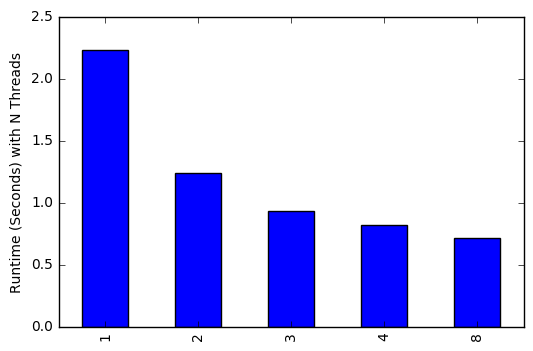

In [19]:
### Deploying Model on Many Texts with .pipe
runtimes = {}

for thread_count in [1,2,3,4,8]:
    t0 =  datetime.now() 
    
    #Create generator of processed documents
    processed_documents = nlp.pipe(texts,n_threads=thread_count)
    
    #Iterate over generator
    for doc in processed_documents: 
        
        #pipeline is only run once we access the generator
        doc.is_parsed 
    
    t1 = datetime.now()
    runtimes[thread_count] = (t1 - t0).total_seconds()
    
ax = pd.Series(runtimes).plot(kind = 'bar')
ax.set_ylabel("Runtime (Seconds) with N Threads")
plt.show()

### Accessing Tokens and Spans

In [18]:
import pandas as pd
def info(obj):
    return {'type':type(obj),'__str__': str(obj)}


text = u"""spaCy excels at large-scale information extraction tasks. 
It's written from the ground up in carefully memory-managed Cython. """
document = nlp(text)
token = document[0]
span = document[0:3]


pd.DataFrame(map(info, [token,span,document]))

,__str__,type
0,spaCy,<type 'spacy.tokens.token.Token'>
1,spaCy excels at,<type 'spacy.tokens.span.Span'>
2,spaCy excels at large-scale information extrac...,<type 'spacy.tokens.doc.Doc'>


### Sentence boundary detection

In [6]:
print(document.sents)
for sent in document.sents:
    print(sent)

I'm executing this code on an Apple Computer.


### Tokenization

In [7]:
for token in document:
    print(token)

I
'm
executing
this
code
on
an
Apple
Computer
.


### Morphological decomposition

In [22]:
token = document[13]
print("text: %s" % token.text)
print("suffix: %s" % token.suffix_) 
print("lemma: %s" % token.lemma_)

text: written
suffix: ten
lemma: write


### Part of Speech Tagging

In [8]:
#Part of speech and Dependency tagging
attrs = map(lambda token: {
                     "token":token
                   , "part of speech":token.pos_
                   , "Dependency" : token.dep_}
                    , document)
pd.DataFrame(attrs)

,Dependency,part of speech,token
0,nsubj,PRON,I
1,aux,VERB,'m
2,ROOT,VERB,executing
3,det,DET,this
4,dobj,NOUN,code
5,prep,ADP,on
6,det,DET,an
7,compound,PROPN,Apple
8,pobj,PROPN,Computer
9,punct,PUNCT,.


### Noun Chunking

In [9]:
print("noun chunks: {}".format(list(document.noun_chunks)))

noun chunks: [I, this code, an Apple Computer]


### Named Entity Recognition

In [10]:
ents = [(ent, ent.root.ent_type_) for ent in document.ents]
print("entities: {}".format(ents))

entities: [(Apple Computer, u'ORG')]


### Text Similarity (Using Word Vectors)

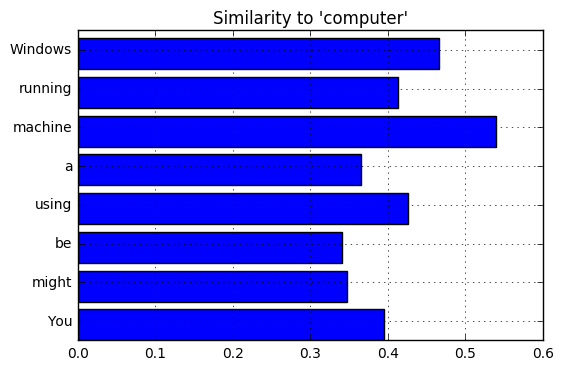

In [27]:
#document, span, and token similarity
def plot_similarities(similarities, target):
    import matplotlib.pyplot as plt
    %matplotlib inline
    f, ax = plt.subplots(1)
    index = range(len(similarities))
    ax.barh(index, similarities)
    ax.set_yticks([i + .5 for i in index])
    ax.set_yticklabels(document2)
    ax.grid()
    ax.set_title("Similarity to '{}'".format(target))
    plt.show()
    
    
computer = nlp(u'computer')
document2 = nlp(u'You might be using a machine running Windows')
similarities = map(lambda token: token.similarity(computer),document2)
plot_similarities(similarities, computer)




    